<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/drive/11scjsE3K5z76nibxbJu3oVx0OV6RMLQN?usp=sharing">
        <img src="https://i.ibb.co/3723Hm9/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/leocd91/geodatahandling">
        <img src="https://i.ibb.co/L5p10GH/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>


# **Introduction** (you can read it or skip it)

By : leocd91@gmail.com

---
Welcome to the fourth episode of "***Digital Geoscience Data Handling using Python***" Series.
During this physical-distancing-new-normal year, I try to compile my experiences in handling digital geoscience / petrotechnical data. 

This will include: Parsing any type of data, QC analysis, database, feeding data for geophysical inversion - machine learning / deep learning stuffs, and maybe handling those data to do some GP-GPU too.

I made this tutorial as beginner-friendly as possible, so some explanation might not be as "*cool & marketing-friendly*" as developers intended. 
And some code are not *pythonic* for that reason too.




any feedback just hmu.

---

**- Why don't we just install X to read those files?**

> Yes you can do that too. 

> This tutorial for those who wish how to parse any digital geoscience data content without dependencies. 
> People who work with geoscience data for some years often struggles with python package that evolve really fast which make their code obsolete quickly. Also some package use their own class/data-type which you will find challenging to inspect your own array.

**- Is there any Prereq.?**

> Just knowing basic stuff about programming is enough.
If you don't even know what an array is, I suggest watching some crash course python on youtube.

 **- Who are you giving some tutorials on the internet!?**

 

> I'm a Petrotechnical Data Management on a NOC in Indonesia. More than 5 years here and still going strong.

> I code my way to finish my undergraduate thesis (FDTD Elastic Wave in cuda) and get some side-gigs from there too (Inversion Method, Numerical Simulation, Etc.).

> I know some C, F95, and Matlab (Now I'm Python *Muallaf* tho).

> My main interest is in computational geophysics and GP-GPU.

> I also *(lazily)* wrote some stuff on my blog about computational geophysics here http://redigitize.blogspot.com/ 

> I also ***love*** deep-fried banana.
 

 
 **TL;DR** I'm not a PhD, CEO, or Someone famous. I'm just glad that I can share something that I learn and learn more from this.

**- Which Python or Software or IDE or whatever that means to learn python? What is this stuff called Notebook!? Even this google colab thing!?   I hate you!**


> Grab your towel and don't panic! 
> You can use this stuff inside google colab thing which people usually call by "notebook format", it's easy to make a step-by-step tutorial here. Also to run your specific line of code you just have to click the "play" button (it's actually RUN button tho) on the left.

> Try this one below!





In [38]:
print("hello stranger, what are you buyin'?") #click run button on the left and see result below.

hello stranger, what are you buyin'?



> As for what "*software*" to use, For me, I rarely use a notebook, some people that prefer IDE or Editor type of python use pycharm (https://www.jetbrains.com/pycharm/) or SPYDER (https://www.spyder-ide.org/) (for former Matlab user, maybe spyder is your favorite editor. It got variable explorer!)

**TL;DR** you can use google colab notebook or install pycharm or install anaconda (got spyder and stuff installed in your pc already like google colab)

---

# **Deviation Trajectory Data Handling**
---
Now how do we handle digital trajectory / deviation survey data using Python?

---

First, just like the last tutorial, We put this 3 lines of code on top of our code. 

<del>We have this habit to always use this just like some cult chants to summon a Dark Lord.</del>
```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
```

we need `numpy` to make array and some scientific function to calculate the deviation survey method, 

`pandas` for... well.. uh.. the dataframe , 
and `matplotlib` to plot those data.

---

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Set up the pandas table look on colab to make it more readable.

In [40]:
%load_ext google.colab.data_table 
#setting display table (only for google colab)

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


---
There are a lot of format for well trajectory / deviation survey. Commonly in ASCII with `.prn` or `.asc` extension and in spreadsheet format.

For this tutorial let's use this sample in ASCII format.

In [41]:
!wget "https://raw.githubusercontent.com/leocd91/geodatahandling/master/sample_data/well-001_dev_survey.prn"

--2020-06-24 06:54:16--  https://raw.githubusercontent.com/leocd91/geodatahandling/master/sample_data/well-001_dev_survey.prn
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1486 (1.5K) [text/plain]
Saving to: ‘well-001_dev_survey.prn.1’

well-001_dev_survey 100%[===================>]   1.45K  --.-KB/s    in 0s      

2020-06-24 06:54:16 (25.6 MB/s) - ‘well-001_dev_survey.prn.1’ saved [1486/1486]



Let's read the data into pandas dataframe.

In [42]:
df_raw = pd.read_csv('well-001_dev_survey.prn', delimiter=',')

In [43]:
df_raw

,MD(M),Inclination,Azimuth
0,0.0,0.0,N 0 E
1,168.9,0.0,N 0 E
2,178.5,2.5,N 1 E
3,190.4,4.5,N 1.3 E
4,210.9,5.9,N 1.6 E
...,...,...,...
65,1479.8,40.4,N 63.46 E
66,1483.8,40.4,N 63.45 E
67,1493.0,41.1,N 63.6 E
68,1532.5,41.5,N 64.38 E


---
Nice. 

But those azimuth it's still in a `string` and bearing format, glad all of them are in **N ... E** so let's just get the number using regex and convert it into `float` (just like the LAS tutorial).

In [44]:
df_raw['Azimuth']=df_raw['Azimuth'].str.extract('(\d*\.\d+|\d+)')

In [45]:
df_raw=df_raw.astype('float')
df_raw.dtypes

MD(M)          float64
Inclination    float64
Azimuth        float64
dtype: object

Let's see the result.

In [46]:
df_raw

,MD(M),Inclination,Azimuth
0,0.0,0.0,0.00
1,168.9,0.0,0.00
2,178.5,2.5,1.00
3,190.4,4.5,1.30
4,210.9,5.9,1.60
...,...,...,...
65,1479.8,40.4,63.46
66,1483.8,40.4,63.45
67,1493.0,41.1,63.60
68,1532.5,41.5,64.38


# **Let's Calculate the TVD and stuff**

---
There are a lot of method to calculate the **TVD** (True Vertical Depth) and **subsurface coordinate** of well trajectory and this paper from [Farah Omar Farah](https://orkustofnun.is/gogn/unu-gtp-report/UNU-GTP-2013-27.pdf) really informative.

Let's use minimum curvature method.

Here's the equation :


 <img src="https://s7.gifyu.com/images/MINCUR.png" width="500"> 

Now let's make some room first for our calculation.

 ---



In [47]:
datalength = df_raw['Azimuth'].shape[0]

In [48]:
df_com=pd.DataFrame(data=np.zeros([datalength,10],dtype=float),columns=['brad','rf','north','east','dtvd','dr','yoff','xoff','r','tvd'])

In [49]:
df_com

,brad,rf,north,east,dtvd,dr,yoff,xoff,r,tvd
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
Now after put the equation and calculate all of them to the dataframe.

In [50]:
for i in range(1,datalength):
  df_com['brad'].values[i]=np.arccos(np.cos((df_raw['Inclination'].values[i]-df_raw['Inclination'].values[i-1])*(np.pi/180.0))-
                                   (np.sin(df_raw['Inclination'].values[i-1]*(np.pi/180.0))*np.sin(df_raw['Inclination'].values[i]*(np.pi/180.0)))*
                                    (1.0-np.cos((df_raw['Azimuth'].values[i]-df_raw['Azimuth'].values[i-1])*(np.pi/180.0))))
  if df_com['brad'].values[i]==0.0:
    df_com['rf'].values[i]=0.0
  else:
    df_com['rf'].values[i]=(2.0/df_com['brad'].values[i])*np.tan(df_com['brad'].values[i]/2.0)

  if df_com['brad'].values[i]==0.0:
    df_com['north'].values[i]=(df_raw['MD(M)'].values[i]-df_raw['MD(M)'].values[i-1])*np.sin(df_raw['Inclination'].values[i]*(np.pi/180.0))*np.cos(df_raw['Azimuth'].values[i]*(np.pi/180.0))
  else:
    df_com['north'].values[i]=(df_raw['MD(M)'].values[i]-df_raw['MD(M)'].values[i-1])/2.0*((np.sin(df_raw['Inclination'].values[i-1]*(np.pi/180.0))*np.cos(df_raw['Azimuth'].values[i-1]*(np.pi/180.0)))+
                                                                                          (np.sin(df_raw['Inclination'].values[i]*(np.pi/180.0))*np.cos(df_raw['Azimuth'].values[i]*(np.pi/180.0))))*df_com['rf'].values[i]

  if df_com['brad'].values[i]==0.0:
    df_com['east'].values[i]=(df_raw['MD(M)'].values[i]-df_raw['MD(M)'].values[i-1])*np.sin(df_raw['Inclination'].values[i]*(np.pi/180.0))*np.sin(df_raw['Azimuth'].values[i]*(np.pi/180.0))
  else:
    df_com['east'].values[i]=(df_raw['MD(M)'].values[i]-df_raw['MD(M)'].values[i-1])/2.0*((np.sin(df_raw['Inclination'].values[i-1]*(np.pi/180.0))*np.sin(df_raw['Azimuth'].values[i-1]*(np.pi/180.0)))+
                                                                                          (np.sin(df_raw['Inclination'].values[i]*(np.pi/180.0))*np.sin(df_raw['Azimuth'].values[i]*(np.pi/180.0))))*df_com['rf'].values[i]

  df_com['dr'].values[i]=np.sqrt((df_com['north'].values[i]**2)+(df_com['east'].values[i]**2))
  df_com['r'].values[i]=df_com['r'].values[i-1]+df_com['dr'].values[i]
  df_com['xoff'].values[i]=df_com['xoff'].values[i-1]+df_com['east'].values[i]
  df_com['yoff'].values[i]=df_com['yoff'].values[i-1]+df_com['north'].values[i]

  if df_com['brad'].values[i]==0.0:
    df_com['dtvd'].values[i]=(df_raw['MD(M)'].values[i]-df_raw['MD(M)'].values[i-1])*np.cos(df_raw['Inclination'].values[i]*(np.pi/180.0))
  else:
    df_com['dtvd'].values[i]=(df_raw['MD(M)'].values[i]-df_raw['MD(M)'].values[i-1])/2.0*((np.cos(df_raw['Inclination'].values[i-1]*(np.pi/180.0))+
                                                                                          np.cos(df_raw['Inclination'].values[i]*(np.pi/180.0)))*df_com['rf'].values[i])
  df_com['tvd'].values[i]=df_com['tvd'].values[i-1]+df_com['dtvd'].values[i]

... and boom! here's our computed result using Minimum Curvature.


In [51]:
df_com

,brad,rf,north,east,dtvd,dr,yoff,xoff,r,tvd
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,168.900000,0.000000,0.000000,0.000000,0.000000,168.900000
2,0.043633,1.000159,0.209374,0.003655,9.596954,0.209406,0.209374,0.003655,0.209406,178.496954
3,0.034908,1.000102,0.726281,0.015122,11.877201,0.726438,0.935655,0.018777,0.935845,190.374155
4,0.024439,1.000050,1.857304,0.047667,20.415123,1.857915,2.792959,0.066443,2.793760,210.789278
...,...,...,...,...,...,...,...,...,...,...
65,0.007978,1.000005,-0.468020,-0.930121,-1.214833,1.041233,543.700335,424.370762,716.287352,1240.637910
66,0.000113,1.000000,1.158581,2.319190,3.046153,2.592480,544.858915,426.689952,718.879831,1243.684064
67,0.012336,1.000013,2.677178,5.375586,6.969556,6.005349,547.536094,432.065538,724.885180,1250.653620
68,0.011378,1.000011,11.431609,23.429501,29.675073,26.069584,558.967703,455.495040,750.954764,1280.328693


We calculated the TVD. 

Now let's put it on our main dataframe.

In [52]:
df_raw['tvd']=df_com['tvd']

---
Now some visualization!

Let's plot it into a polar map.

---

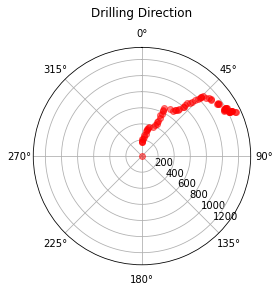

In [53]:
ax = plt.subplot(111, polar=True)
ax.plot( df_raw['Azimuth'].astype('float').values*np.pi/180.0, df_raw['tvd'].values,'or', alpha=0.5, linewidth=3)
ax.set_theta_direction(-1)
ax.grid(True)
ax.set_theta_zero_location("N")
ax.set_title("Drilling Direction",pad=20)
pos=ax.get_rlabel_position()
ax.set_rlabel_position(pos+110)
plt.show()

...and some well path position. Let's put the r into our main dataframe first.

In [54]:
df_raw['r']=df_com['r']

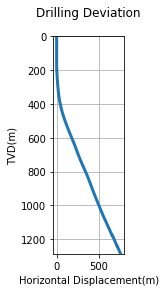

In [60]:
ax2 = plt.subplot(111, aspect=2)
ax2.plot( df_raw['r'].values, df_raw['tvd'].values, linewidth=3)
ax2.grid(True)
ax2.set_title("Drilling Deviation",pad=20)
ax2.set_ylabel('TVD(m)')
ax2.set_xlabel('Horizontal Displacement(m)')
ax2.set_ylim([0, df_raw['tvd'].max()])
ax2.invert_yaxis()
plt.show()

---
We see that we can handle, calculate, and visualize the well deviation survey too.

Alright, that's it!
I hope you can learn something from this tutorial.

---

# **EXERCISES**

1. Can you calculate the deviation survey using different method? 
  - Average angle
  - Tangential
  - Radius of curvature


In [ ]:
(code here)